In [17]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,pi,exp,asin
import time 


In [19]:
height = 5 #height of moon

sigma_l=2 #std of sensor
sigma_theeta=0.2

#position=np.array([1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , 10]) 
position=np.array([10 , 9 , 8 ,7 , 6 , 5 , 4 , 3 , 2 , 1]) 

size=len(position)

belief_l = np.array([1/size]*size ) # Prior
belief_theeta = np.array([1/size]*size )

# Fake measurements for position 
measurement = np.random.normal(7.81, sigma_l, 60)
measurement_theeta = np.random.normal(0.69, sigma_theeta, 60)

epsilon=0.00007

Gaussian_l =[0.0]*size
mean_l =[0]*size

Gaussian_theeta =[0.0]*size
mean_theeta =[0]*size

In [22]:
#Calculating Mean of states (0 to 9)

for idx,i in enumerate(position) :
     
    mean_l[idx] = (sqrt (((position[idx])**2) + (height**2)))
    
    mean_theeta[idx] = asin(height/mean_l[idx])


    

[11.180339887498949, 10.295630140987, 9.433981132056603, 8.602325267042627, 7.810249675906654, 7.0710678118654755, 6.4031242374328485, 5.830951894845301, 5.385164807134504, 5.0990195135927845]     [0.4636476090008061, 0.507098504392337, 0.5585993153435626, 0.6202494859828216, 0.6947382761967033, 0.7853981633974482, 0.896055384571344, 1.0303768265243123, 1.190289949682532, 1.3734007669450161]


In [23]:
#Printing Values

for idx,i in enumerate(position) :
    
    print(idx," ",position[idx], " ",height , measurement[idx] , belief_l[idx] , mean_l[idx] , mean_theeta[idx])


# #Calculating Likelihood of the measurement

# for idx, i in enumerate(position):
    
#     Gaussian[idx] = (1/sigma*(sqrt(2*pi))) * exp(-0.5 * ((measurement - mean[idx])/sigma)**2)
    
# print(Gaussian)

0   10   5 8.032388437942956 0.1 11.180339887498949 0.4636476090008061
1   9   5 9.749648773663159 0.1 10.295630140987 0.507098504392337
2   8   5 8.619640983640737 0.1 9.433981132056603 0.5585993153435626
3   7   5 7.582152916742096 0.1 8.602325267042627 0.6202494859828216
4   6   5 7.504689257197043 0.1 7.810249675906654 0.6947382761967033
5   5   5 7.848910295473941 0.1 7.0710678118654755 0.7853981633974482
6   4   5 7.71926628592307 0.1 6.4031242374328485 0.896055384571344
7   3   5 10.150734819974897 0.1 5.830951894845301 1.0303768265243123
8   2   5 7.474607351707622 0.1 5.385164807134504 1.190289949682532
9   1   5 10.889140306063299 0.1 5.0990195135927845 1.3734007669450161


<IPython.core.display.Javascript object>


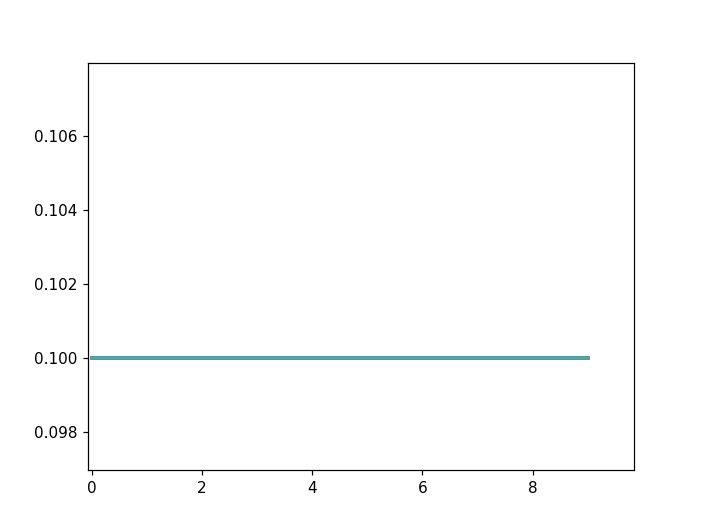

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

num_bars=10




#Calculating Posterior and updating belief 

for m in range(len(measurement)):
    
    #Bayes iteration    
    belief_sum_l = 0

    
    #print(measurement[m])
    
    #Finding likelihood and posterior for measurement[m] 

    for idx in range(len(position)):


        #print(Gaussian[idx] ,measurement[m] , mean[idx] , pi ,epsilon)
        
        Gaussian_l[idx] = (1/sigma_l*(sqrt(2*pi))) * exp(-0.5 * ((measurement[m] - mean_l[idx])/sigma_l)**2)
        Gaussian_theeta[idx] = (1/sigma_theeta*(sqrt(2*pi))) * exp(-0.5 * ((measurement[m] - mean_theeta[idx])/sigma_theeta)**2)
        
        
        #Finding posterior           

        belief_l[idx]= belief_l[idx] * Gaussian_l[idx] *Gaussian_theeta[idx] + epsilon #Posterior
        
        belief_sum_l+= belief_l[idx]
      
    
    #normalize posterior
    belief_l = belief_l/belief_sum_l
    
    plt.plot(belief_l)
    
#     n , bins , patches = plt.hist(belief,num_bars,facecolor='green',alpha=1)

    

    
    #plotting
#     ax.clear()
#     ax.plot(belief_l)
#     fig.canvas.draw()
#     plt.pause(1/30)


   



    
    
